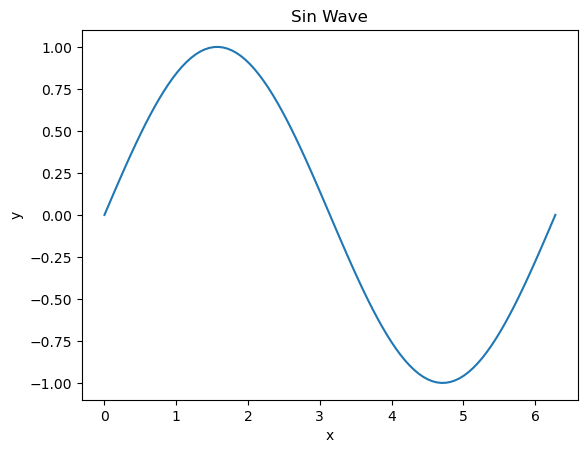

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# test
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# draw
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin Wave')
plt.show()


In [3]:
mimic_path='/Users/jieche/Desktop/machine learning/mimic-iv-2.2/'



In [5]:
chunk_size = 1500000

# Read the CSV file in chunks and save each chunk as a CSV file
i = 0
for chunk in pd.read_csv(mimic_path + '/hosp/labevents.csv.gz', compression='gzip', chunksize=chunk_size):
    chunk.drop(['labevent_id', 'hadm_id','order_provider_id', 'value', 'ref_range_lower', 'ref_range_upper', 'flag', 'priority', 'comments'],
               axis='columns', inplace=True)
    chunk.to_csv(f'chunk_{i}.csv', index=False)
    i += 1

# Read and concatenate the saved chunks into a single dataframe
chunks = []
for i in range(i):
    chunk = pd.read_csv(f'chunk_{i}.csv')
    chunks.append(chunk)

lab_results = pd.concat(chunks, ignore_index=True)


In [8]:
i=0


# Read and concatenate the saved chunks into a single dataframe

chunks = []
for i in range(79):
    chunk = pd.read_csv(f'chunk_{i}.csv')
    chunks.append(chunk)


lab_results = pd.concat(chunks, ignore_index=True)


In [6]:
diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118171367 entries, 0 to 118171366
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   subject_id   int64  
 1   specimen_id  int64  
 2   itemid       int64  
 3   charttime    object 
 4   storetime    object 
 5   valuenum     float64
 6   valueuom     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 6.2+ GB


In [7]:
diag.head()

,subject_id,specimen_id,itemid,charttime,storetime,valuenum,valueuom
0,10000032,45421181,51237,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,NaN
1,10000032,45421181,51274,2180-03-23 11:51:00,2180-03-23 15:15:00,15.1,sec
2,10000032,52958335,50853,2180-03-23 11:51:00,2180-03-25 11:06:00,15.0,ng/mL
3,10000032,52958335,50861,2180-03-23 11:51:00,2180-03-23 16:40:00,102.0,IU/L
4,10000032,52958335,50862,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,g/dL


In [9]:
lab_results = lab_results.drop('specimen_id', axis=1)

In [10]:
lab_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118171367 entries, 0 to 118171366
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   subject_id  int64  
 1   itemid      int64  
 2   charttime   object 
 3   storetime   object 
 4   valuenum    float64
 5   valueuom    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 5.3+ GB


In [11]:
lab_results.to_csv('lab_results.csv', index=False)


In [17]:
lab_results['itemid'].value_counts()


51221    3325700
50912    3282278
51265    3216656
51006    3189474
51222    3188835
          ...   
51784          1
51459          1
52113          1
52371          1
52055          1
Name: itemid, Length: 915, dtype: int64

In [21]:
freq_items = lab_results['itemid'].value_counts()
freq_items = freq_items[freq_items > 100000].index.tolist()
print(freq_items)

[51221, 50912, 51265, 51006, 51222, 51301, 51249, 51279, 51250, 51248, 51277, 50971, 50983, 50902, 50882, 50868, 50931, 50893, 50960, 50970, 50934, 51678, 50947, 51237, 51274, 50920, 52172, 50861, 50878, 51275, 51244, 51256, 51254, 51200, 51146, 50885, 50863, 50862, 51498, 51508, 51486, 51506, 51491, 51466, 51492, 51478, 51484, 51464, 51487, 51514, 51087, 52033, 50820, 52075, 52073, 52074, 52069, 51133, 50821, 50802, 50804, 50818, 50813, 51516, 51493, 51463, 51519, 51476, 50954, 52135, 51003, 51512, 50993, 50933, 50808, 50910, 50887, 51266, 50907, 51000, 50822, 50904, 50903, 51137, 51267, 50956, 51246, 50955, 51268, 51252, 50911, 51233, 50852, 50905, 51144, 50809, 51251, 51255, 51143, 51613, 51082, 50817, 50979, 50976, 51103, 50812, 50924, 51007, 51107, 50930, 50889, 50952, 51260, 50824, 50810, 50811, 51214, 51482, 50998, 50953, 51010, 50825, 50995]


In [45]:
lab_results['itemid'].value_counts().get(50809, 0)


211004

The values I need are: glucose 50809, Hemoglobin A1c 50852, Triglycerides 51000, HDL 50904, LDL 50905, creatinine 50912, uric acid 51007 ,Urea Nitrogen 51006

In [47]:
# 将需要的 itemid 对应的 valuenum 透视出来
lab_results_pivot = lab_results[lab_results['itemid'].isin([50809, 50852, 51000, 50904, 50905, 50912, 51007, 51006])]\
    .pivot_table(index='itemid', columns='subject_id', values='valuenum', aggfunc='mean')

#lab_results_pivot = lab_results[lab_results['itemid'].isin([50809, 50852, 51000, 50904, 50905, 50912, 51007, 51006])]\
    #.pivot_table(index='subject_id', columns='itemid', values='valuenum', aggfunc='list') \
    #.stack() \
    #.reset_index(name='value') \
    #.rename(columns={'level_1': 'itemid'})
# 将透视后的数据转置，使得 subject_id 成为行索引
lab_results_pivot = lab_results_pivot.T
# 将列名重命名为对应的 itemid
lab_results_pivot.columns = ['Glucose', 'Hemoglobin A1c',
                             'HDL', 'LDL', 'Creatinine', 'Triglycerides', 'Urea Nitrogen', 'Uric Acid']
#lab_results_pivot = lab_results_pivot.reset_index()
# 将透视结果与原数据集合并，保留所有的 subject_id
#lab_results_new = pd.merge(lab_results[['subject_id']].drop_duplicates(), lab_results_pivot, left_on='subject_id', right_index=True, how='left')


In [48]:
lab_results_pivot.head()


,Glucose,Hemoglobin A1c,HDL,LDL,Creatinine,Triglycerides,Urea Nitrogen,Uric Acid
subject_id,,,,,,,,
10000032,NaN,NaN,52.000000,135.000000,0.466667,73.000000,30.388889,NaN
10000048,NaN,NaN,NaN,NaN,0.700000,NaN,16.000000,NaN
10000084,NaN,NaN,NaN,NaN,0.733333,NaN,12.666667,NaN
10000108,NaN,NaN,NaN,NaN,1.000000,NaN,12.000000,NaN
10000117,NaN,5.3,71.142857,154.285714,0.868750,90.857143,10.066667,NaN


In [49]:
lab_results_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242288 entries, 10000032 to 19999987
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Glucose         46609 non-null   float64
 1   Hemoglobin A1c  74715 non-null   float64
 2   HDL             82375 non-null   float64
 3   LDL             78437 non-null   float64
 4   Creatinine      239831 non-null  float64
 5   Triglycerides   84508 non-null   float64
 6   Urea Nitrogen   237983 non-null  float64
 7   Uric Acid       23723 non-null   float64
dtypes: float64(8)
memory usage: 16.6 MB


In [50]:
lab_results_pivot.to_csv('lab_results_pivot.csv')
